Text Generation

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()
import numpy as numpy
import nltk
from nltk.tokenize import sent_tokenize
from nltk import tokenize

import matplotlib.pyplot as pyplot


In [3]:
data= pd.read_csv('../proje/Jobs_IT (1).csv')
data.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri


In [4]:
data.shape

(2500, 4)

In [5]:
print('Number of Classification =',len (data['Classification'].unique()))
print('Number of DigerPozisyon= ',len (data['DigerPozisyon'].unique()))

Number of Classification = 1
Number of DigerPozisyon=  1131


Cleaning Text

In [6]:
def CleanHtml(text):
    return BeautifulSoup(text).getText('')


In [7]:
CleanHtml(BeautifulSoup(data.iloc[2]['Qualifications']).get_text(""))

'Şartlar08.30 - 18.30 arası mesai saatleri. Sadece pazar günleri çalışmıyoruz. Yerimiz Kızılay- Kolejdedir.NiteliklerOrta seviye Photoshop (Zorunlu)Tercihen Adobe premier bilenTercihen orta seviye İngilizce okuma ve yazmaTercihen ürün çekimi konusunda tecrübeli.İşin TanımıGrafik tasarımın yanı sıra İdari işlerde yardımcı olacak ekip arkadaşı ihtiyacımız vardır.\xa0Siparişleri\xa0ayarlama, kargo paketleme, baskı makinalarının kullanımı gibi gün içinde bizler ne yapıyorsak yardımcı olacak personel işe alınacaktır. Ara sıra Adobe premier ve photoshopta projeler verilecektir bu nedenle bilen kişileri tercih ediyoruz.'

In [8]:
data['Qualifications_HtmlFree'] = data.progress_apply(lambda x: CleanHtml(x['Qualifications']),axis=1)

100%|██████████| 2500/2500 [00:02<00:00, 951.62it/s] 


In [9]:
data.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,"Yeditek Yeni Dijital Teknolojiler A.Ş.Yeditek,..."
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...


In [46]:
length = len(data['Qualifications'][2])
print(f'Length of a sample job description: {length}')

Length of a sample job description: 693


In [11]:
data['length'] = data ['Qualifications_HtmlFree'].str.len()
data.head(5)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,"Yeditek Yeni Dijital Teknolojiler A.Ş.Yeditek,...",695
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...,2382


In [12]:
word_count = data['Qualifications_HtmlFree'][3].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [13]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

data['Word_count'] = data['Qualifications_HtmlFree'].progress_apply(word_count)
data.head(3)

100%|██████████| 2500/2500 [00:00<00:00, 34142.78it/s]


,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length,Word_count
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613,73


In [14]:
import numpy as np 
data['mean_word_length'] = data['Qualifications_HtmlFree'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(3)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length,Word_count,mean_word_length
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613,73,7.410959


In [15]:
data['mean_sent_length'] = data['Qualifications_HtmlFree'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(3)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length,Word_count,mean_word_length,mean_sent_length
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000,126.0
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000,111.0
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613,73,7.410959,121.8


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Classification)
data['categorical_label'] = le.transform(data.Classification)
data['categorical_label'] = data['categorical_label'].astype(int)
data.head(3)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length,Word_count,mean_word_length,mean_sent_length,categorical_label
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000,126.0,0
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000,111.0,0
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613,73,7.410959,121.8,0


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col])
    plt.ylabel(col, labelpad=12.5)
    
 
    plt.show()

In [18]:
data.columns.tolist()[5:]

['length',
 'Word_count',
 'mean_word_length',
 'mean_sent_length',
 'categorical_label']

c:\Users\melik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


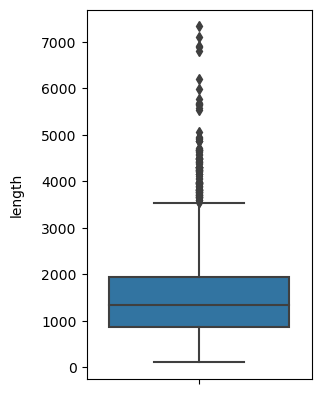

c:\Users\melik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


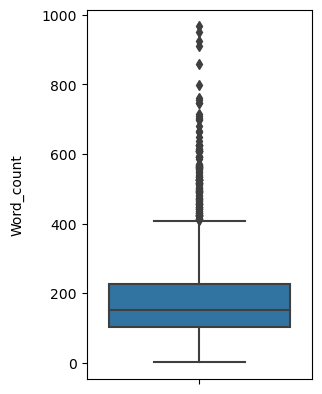

c:\Users\melik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


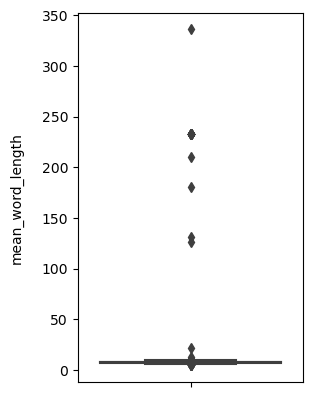

c:\Users\melik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


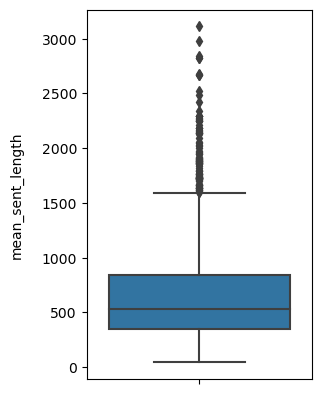

c:\Users\melik\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


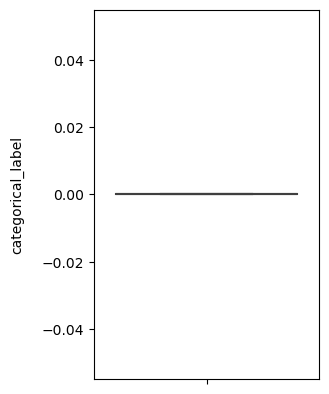

In [19]:
features = data.columns.tolist()[5:]
for feature in features:
    visualize(feature)

FREKANS ANALİZİ

In [20]:
df = data.drop(features, axis=1)
df.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,"Yeditek Yeni Dijital Teknolojiler A.Ş.Yeditek,..."
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   JobRefNo                 2500 non-null   int64 
 1   DigerPozisyon            2500 non-null   object
 2   Qualifications           2500 non-null   object
 3   Classification           2500 non-null   object
 4   Qualifications_HtmlFree  2500 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.8+ KB


In [22]:
from nltk.corpus import stopwords
stopwordList = stopwords.words('english') + stopwords.words('turkish')

stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
def clean(review):
    
    review = re.sub(r'(?<![a-zA-ZçÇğĞıİöÖşŞüÜ])\w+|\w+(?![a-zA-ZçÇğĞıİöÖşŞüÜ])', ' ', review)
    review = review.lower()
    review = review.replace('&nbsp;', ' ').replace('“', ' ').replace('·', ' ').replace('i̇','i')
    review = review.replace('•', ' ').replace('\xa0', ' ')
    review = review.replace('”', ' ').replace('nan', '').replace('\r', '').replace('’', ' ')
    review = " ".join([word for word in review.split() if word not in stopwordList])
    
    return review

In [24]:
def tokenize(text):
    
    #http veya htps ile başlayan urlleri eşleştirir.
    
    text = re.sub(r'http\S+', '', text)

    # "r"#(\w+)": metindeki  "#" karakterini arar.
    text = re.sub(r"#(\w+)", '', text)

   # "@" harf rakamlar veya alt çizgiler ile eşleştirir.
    text = re.sub(r"@(\w+)", '', text)
    
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip().lower()
    text = text.replace('&nbsp;', ' ').replace('“', ' ').replace('·', ' ').replace('i̇','i')
    text = text.replace('•', ' ').replace('\xa0', ' ')
    text = text.replace('”', ' ').replace('nan', '').replace('\r', '').replace('’', ' ')
    text = " ".join([word for word in text.split() if word not in stopwordList])
    return text

In [25]:
import re
tokenize(data.iloc[7]['Qualifications_HtmlFree'])

'genel niteliklerüniversitelerin ilgili bölümlerinden mezuntercihen turizm sektöründe ilgili pozisyonda 2 yıl deneyimlilogo mc opera program uygulamalarına hakimsistem veveya ağ yönetimi konusunda deneyim sahibibilgi gizliliği ilkesine önem verenwindows server işletim sistemlerine hakimdoım ms sql server bilgisine sahipiyi derecede ingilizce bileniş tanimikurum sistem alt yapısını oluşturan bileşenlerin depolama yedekleme ağ iletişim sanallaştırma kamera sistemleri vb bakım yönetim izleme faaliyetlerini gerçekleştirmektemel bilgisayar doım işletim sistemi arızalarını tespit edip gidermek gerektiğinde kablolama parça değişimi yapmaksistemlerde düzenli kontrolleri gerçekleştirerek olası problemleri önceden tespit etmekbilgi güvenliği siber güvenlik konularında mevcut sistem altyapıları olası türlü açıklara karşı güvenli tutmakmevcut uygulamaların teknik altyapısını iyileştirecek çözümler bulunmasını sağlamakhotel overviewswissotel cesme resort spa located izmir çeşme offers 248 rooms 104

In [26]:
data.iloc[7]['Qualifications_HtmlFree']

'GENEL NİTELİKLERÜniversitelerin ilgili bölümlerinden mezun,Tercihen Turizm sektöründe ilgili pozisyonda en az 2 yıl deneyimli,Logo, MC, Opera Program Uygulamalarına hakim,Sistem ve/veya ağ yönetimi konusunda deneyim sahibi,Bilgi Gizliliği İlkesine önem veren,Windows Server İşletim Sistemlerine hakim,Donanım ve MS SQL Server bilgisine sahip,İyi derecede İngilizce bilen.İŞ TANIMIKurum sistem alt yapısını oluşturan tüm bileşenlerin (depolama, yedekleme, Ağ, iletişim, sanallaştırma, kamera sistemleri vb) bakım, yönetim ve izleme faaliyetlerini gerçekleştirmek,Temel bilgisayar donanım ve işletim sistemi arızalarını tespit edip gidermek, gerektiğinde kablolama ve parça değişimi yapmak,Sistemlerde düzenli kontrolleri gerçekleştirerek olası problemleri önceden tespit etmek,Bilgi güvenliği ve siber güvenlik konularında mevcut sistem ve altyapıları olası her türlü açıklara karşı güvenli tutmak,Mevcut uygulamaların teknik altyapısını iyileştirecek çözümler bulunmasını sağlamak.Hotel OverviewSwis

In [27]:
data['Clean'] = data['Qualifications_HtmlFree'].apply(tokenize)
data.head(3)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length,Word_count,mean_word_length,mean_sent_length,categorical_label,Clean
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000,126.0,0,3464105346410534641053464105346410534641053464...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000,111.0,0,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613,73,7.410959,121.8,0,şartlar0830 1830 arası mesai saatleri sadece p...


In [28]:
data.to_csv('../../Masaüstü/proje/cleanedJobs_IT (1).csv' , index=False)

In [29]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()

In [30]:
data = pd.read_csv('../../Masaüstü/proje/cleanedJobs_IT (1).csv')

data.head(5)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,length,Word_count,mean_word_length,mean_sent_length,categorical_label,Clean
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000,126.0,0,3464105346410534641053464105346410534641053464...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000,111.0,0,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar08.30 - 18.30 arası mesai saatleri. Sad...,613,73,7.410959,121.8,0,şartlar0830 1830 arası mesai saatleri sadece p...
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,"Yeditek Yeni Dijital Teknolojiler A.Ş.Yeditek,...",695,87,7.000000,347.0,0,yeditek yeni dijital teknolojiler aşyeditek en...
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...,2382,287,7.292683,1190.0,0,türkiyede eğitim teknolojileri alanının ilk ön...


In [31]:
jobTexts = data['Clean'].tolist()
jobTexts[4]

'türkiyede eğitim teknolojileri alanının ilk öncü şirketi olan enocta hizmet verdiği kurumlarda çalışanların iş performansını artıran yolla kurumların iş sonuçlarına katkı sağlayan yeni nesil eğitim gelişim uygulamaları teknolojileri sunarbugünün iş dünyasında başarı etkin iş sonuçları sürekli öğrenen gelişen bireyler kurumlar mümkün enocta geliştirdiği öğrenme teknolojileri sunduğu içerikler müşterilerinin başarısını amaç edinen hizmet anlayışıyla türkiyenin değerli markaları çalışmakta birlikte çalıştığı kurumların başarısına katkı sağlamaktadır500e yakın müşterimize 2 milyondan fazla çalışanına eğitim gelişim yoluyla değer katarak yenilikçi ürün hizmetler geliştiren keyifli bir ekibin parçası olacak multimedya tasarım uzmanını arıyoruzgenel nitelikler tercihen üniversitelerin iletişim tasarımı görsel iletişim tasarımı sinema tv eğitim fakültesi bilgisayar öğretim teknolojileri eğitimi lisans programlarından mezun dijital içerik türleri üretim teknikleri standartları konusunda 2 yıll

In [32]:
with open ('../proje/cleanedJobs_IT (1).txt', 'w') as f:
    for line in jobTexts:
        f.write(f"{line}\n\n")

jobTexts[20]

'veri giriş elemanihakkimizda tezmaksan robot teknolojileri 1981 yılında kurulan türkiyenin lider avrupanın ikinci büyük markası olarak talaşlı imalat sektöründe cnc satış kiralama servis teknolojik danışmanlık fisman yazılım sektörel eğitim geniş kapsamlı faaliyetler yürüten tezmaksan makina tarafından 2009 yılında kuruldu 2 milyon euro yatırım sermayesi kurulan tezmaksan robot teknolojileri hadımköyde 3000 metrekarelik yeni binasında fabrikaları çağın ihtiyaçlarına uygun şekilde robot otomasyon yazılım çözümleriyle hizmet vermektedir sektöre yüksek performanslı projeler yazılımlar kazandırarak üretim sanayisinin güçlü oyuncuları olan fabrikaların otomasyon teknolojisine entegre olmasını sağlamayı amaçlamaktadır günümüz endüstriyel üretiminin gereksinimi olan otomasyon robotlu hat kurulumu robotlu otomasyon konularında anahtar teslim çözümler sunmaktadır tasarım üretimine başladığı marka model cnc dik işleme merkezleri cnc tornalar uyumlu yarım günden bir sürede kurulumuyla zaman tasa

In [33]:
pip install --upgrade  transformers

Note: you may need to restart the kernel to use updated packages.


In [34]:
from transformers import GPT2Tokenizer, TextDataset, DataCollatorForLanguageModeling, GPT2LMHeadModel, pipeline, \
                         Trainer, TrainingArguments

In [35]:
tokenizer= GPT2Tokenizer.from_pretrained('gpt2')

tokenizer.pad_token = tokenizer.eos_token

In [36]:
pds_data = TextDataset(
    tokenizer = tokenizer,
    file_path= '../proje/cleanedJobs_IT (1).txt' ,
    block_size=64
)

c:\Users\melik\anaconda3\Lib\site-packages\transformers\data\datasets\language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(


In [37]:
pds_data[0], pds_data[0].shape 

(tensor([ 2682,  2414, 13348,  2682,  2414, 13348,  2682,  2414, 13348,  2682,
          2414, 13348,  2682,  2414, 13348,  2682,  2414, 13348,  2682,  2414,
         13348,  2682,  2414, 13348,  2682,  2414, 13348,  2682,  2414, 13348,
          2682,  2414, 13348,  2682,  2414, 13348,  2682,  2414, 13348,  2682,
          2414, 13348,  2682,  2414, 13348,  2682,  2414, 13348,  2682,  2414,
         13348,  2682,  2414, 13348,   198,   198,   824, 42421, 34388,  8457,
            67,   591,  1228,    75]),
 torch.Size([64]))

In [38]:
print(tokenizer.decode(pds_data[0]))

346410534641053464105346410534641053464105346410534641053464105346410534641053464105346410534641053464105346410534641053464105

sskjdkjsdksajl


In [39]:
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False, )

In [40]:
model = GPT2LMHeadModel.from_pretrained('gpt2') #gpt2 modelinin yükle

pretrained_generator = pipeline(
    'text-generation',
        model=model,
            tokenizer= 'gpt2',
        
    config= {'max_length':1000,
             'do_sample': True,
             'top_p': 0.5,
             'temperature':0.2,
             'top_k':10 })
             
               


In [41]:
print('----------')
for generated_sequence in pretrained_generator('Genel nitelikler', num_return_sequences=3):
    print(generated_sequence['generated_text'])
    print('----------')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


----------
Genel nitelikler. [3] https://www.reddit.com/r/The_Donald/comments/5h6oqp/donna_take_my_dog_after_he_hides_a
----------
Genel nitelikleri is a Belgian maker of rubber gloves and accessories, and is available worldwide.
----------
Genel nitelikleri, and the first paper to investigate its use as a therapeutic for epilepsy. They then reviewed the medical literature and concluded that the combination of nitric oxide and the drug might be useful in treatment of epileptic seizures.
----------


In [42]:
print('----------')
for generated_sequence in pretrained_generator('iş alımlarında genenel niteliklerin şartları ', num_return_sequences=3):
    print(generated_sequence['generated_text'])
    print('----------')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


----------
iş alımlarında genenel niteliklerin şartları irtaşlerin erikliklarıtlarında de kelepıylarızal eyhtı
----------
iş alımlarında genenel niteliklerin şartları izlak lupakur.ın ñnık veşi lamaarında öndilam
----------
iş alımlarında genenel niteliklerin şartları ıkirıy. Eşil mültençu yasıl hanık diziero:
----------


In [43]:
import os
os.environ["WANDB_DISABLED"]="true"

In [44]:
from transformers import Trainer
from accelerate import Accelerator

training_args = TrainingArguments(
    output_dir="../../Data/Weights/gpt2_pds",
    overwrite_output_dir=True, 
    num_train_epochs=3, 
    per_device_train_batch_size=32, 
    per_device_eval_batch_size=32,  
    logging_steps=10,
    load_best_model_at_end=True,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    report_to='none'
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=pds_data.examples[:int(len(pds_data.examples)*.8)],
    eval_dataset=pds_data.examples[int(len(pds_data.examples)*.8):]
)

trainer.evaluate()


  0%|          | 0/133 [00:00<?, ?it/s]

{'eval_loss': 5.818464279174805,
 'eval_runtime': 899.4946,
 'eval_samples_per_second': 4.708,
 'eval_steps_per_second': 0.148}

In [45]:
trainer.train()

  0%|          | 0/1590 [00:00<?, ?it/s]

{'loss': 5.5449, 'learning_rate': 4.968553459119497e-05, 'epoch': 0.02}
{'loss': 4.9901, 'learning_rate': 4.937106918238994e-05, 'epoch': 0.04}
{'loss': 4.5603, 'learning_rate': 4.9056603773584906e-05, 'epoch': 0.06}
{'loss': 4.1977, 'learning_rate': 4.8742138364779875e-05, 'epoch': 0.08}
{'loss': 4.0418, 'learning_rate': 4.842767295597484e-05, 'epoch': 0.09}
{'loss': 3.8353, 'learning_rate': 4.811320754716982e-05, 'epoch': 0.11}
{'loss': 3.6792, 'learning_rate': 4.7798742138364785e-05, 'epoch': 0.13}
{'loss': 3.5433, 'learning_rate': 4.7484276729559753e-05, 'epoch': 0.15}
{'loss': 3.5897, 'learning_rate': 4.716981132075472e-05, 'epoch': 0.17}
{'loss': 3.5517, 'learning_rate': 4.685534591194969e-05, 'epoch': 0.19}
{'loss': 3.4254, 'learning_rate': 4.654088050314466e-05, 'epoch': 0.21}
{'loss': 3.4131, 'learning_rate': 4.6226415094339625e-05, 'epoch': 0.23}
{'loss': 3.2313, 'learning_rate': 4.5911949685534594e-05, 'epoch': 0.25}
{'loss': 3.3002, 'learning_rate': 4.559748427672956e-05, '

  0%|          | 0/133 [00:00<?, ?it/s]

Checkpoint destination directory ../../Data/Weights/gpt2_pds\checkpoint-530 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 2.5653798580169678, 'eval_runtime': 1025.0618, 'eval_samples_per_second': 4.131, 'eval_steps_per_second': 0.13, 'epoch': 1.0}
{'loss': 2.7534, 'learning_rate': 3.30188679245283e-05, 'epoch': 1.02}
{'loss': 2.7324, 'learning_rate': 3.270440251572327e-05, 'epoch': 1.04}
{'loss': 2.7356, 'learning_rate': 3.238993710691824e-05, 'epoch': 1.06}
{'loss': 2.6168, 'learning_rate': 3.207547169811321e-05, 'epoch': 1.08}
{'loss': 2.5834, 'learning_rate': 3.1761006289308175e-05, 'epoch': 1.09}
{'loss': 2.5299, 'learning_rate': 3.144654088050314e-05, 'epoch': 1.11}
{'loss': 2.6239, 'learning_rate': 3.113207547169811e-05, 'epoch': 1.13}
{'loss': 2.5968, 'learning_rate': 3.081761006289308e-05, 'epoch': 1.15}
{'loss': 2.5634, 'learning_rate': 3.050314465408805e-05, 'epoch': 1.17}
{'loss': 2.5711, 'learning_rate': 3.018867924528302e-05, 'epoch': 1.19}
{'loss': 2.647, 'learning_rate': 2.9874213836477987e-05, 'epoch': 1.21}
{'loss': 2.4676, 'learning_rate': 2.9559748427672958e-05, 'epoch': 1

  0%|          | 0/133 [00:00<?, ?it/s]

Checkpoint destination directory ../../Data/Weights/gpt2_pds\checkpoint-1060 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'eval_loss': 2.374419689178467, 'eval_runtime': 5202.6636, 'eval_samples_per_second': 0.814, 'eval_steps_per_second': 0.026, 'epoch': 2.0}
{'loss': 2.3317, 'learning_rate': 1.6352201257861635e-05, 'epoch': 2.02}
{'loss': 2.4853, 'learning_rate': 1.6037735849056604e-05, 'epoch': 2.04}
{'loss': 2.2857, 'learning_rate': 1.572327044025157e-05, 'epoch': 2.06}
{'loss': 2.5313, 'learning_rate': 1.540880503144654e-05, 'epoch': 2.08}
{'loss': 2.3764, 'learning_rate': 1.509433962264151e-05, 'epoch': 2.09}
{'loss': 2.3441, 'learning_rate': 1.4779874213836479e-05, 'epoch': 2.11}
{'loss': 2.4234, 'learning_rate': 1.4465408805031447e-05, 'epoch': 2.13}
{'loss': 2.4278, 'learning_rate': 1.4150943396226415e-05, 'epoch': 2.15}
{'loss': 2.4155, 'learning_rate': 1.3836477987421385e-05, 'epoch': 2.17}
{'loss': 2.3831, 'learning_rate': 1.3522012578616353e-05, 'epoch': 2.19}
{'loss': 2.5451, 'learning_rate': 1.320754716981132e-05, 'epoch': 2.21}
{'loss': 2.3559, 'learning_rate': 1.289308176100629e-05, 'epo

  0%|          | 0/133 [00:00<?, ?it/s]

{'eval_loss': 2.325981378555298, 'eval_runtime': 598.2747, 'eval_samples_per_second': 7.079, 'eval_steps_per_second': 0.222, 'epoch': 3.0}


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


{'train_runtime': 86309.8293, 'train_samples_per_second': 0.589, 'train_steps_per_second': 0.018, 'train_loss': 2.689641193173966, 'epoch': 3.0}


TrainOutput(global_step=1590, training_loss=2.689641193173966, metrics={'train_runtime': 86309.8293, 'train_samples_per_second': 0.589, 'train_steps_per_second': 0.018, 'train_loss': 2.689641193173966, 'epoch': 3.0})

In [47]:
trainer.evaluate()  

  0%|          | 0/133 [00:00<?, ?it/s]

{'eval_loss': 2.325981378555298,
 'eval_runtime': 940.2268,
 'eval_samples_per_second': 4.504,
 'eval_steps_per_second': 0.141,
 'epoch': 3.0}

In [48]:
print('----------')
for generated_sequence in pretrained_generator('', num_return_sequences=3):
    print(generated_sequence['generated_text'])
    print('----------')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


----------
Experienced in machine learning skills like python strong knowledge object oriented architecture experience data driven learning data manipulation similar experience solid object oriented concepts like datatrade architecture experience data integrity data mining c oop experience nodejs vb familiarity data mining solid knowledge data mining
----------
Experienced in machine learning skills like familiar ioc ms sql server konularında hakim olanproficiency cloud computing similar server hardware oracle applications similar experience linux plusexperience network management web services applications plusexperience sql server software
----------
Experienced in machine learning skills like fluent english good communication english ability work projects quickly working team environment comfortable basic english working environment english minimal risk workplace interactionspersonal preferences male candidates contact information available atjob descriptionlooking rolesemi work role

In [49]:
print('----------')
for generated_sequence in pretrained_generator('Makine öğrenimi deneyimine sahip', num_return_sequences=3):
    print(generated_sequence['generated_text'])
    print('----------')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


----------
Makine öğrenimi deneyimine sahipinin sağlanması kullanılan mimari sistemi konfigürasyonunu sağlamakkullanıcı
----------
Makine öğrenimi deneyimine sahipgrafik tasarım arkadaşı arayışımız bulunmaktadır

unveiled software solutions
----------
Makine öğrenimi deneyimine sahip olmaktadır

genel nitelikler iş tanimiürüniversitelerin endüstri mühendisl
----------
